In [1]:
import torch
import torchaudio
import matplotlib.pyplot as plt

In [45]:
filepath = "./sounds/a_octave.wav" 
waveform, sample_rate = torchaudio.load(filepath)
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

SAMPLING_RATE = 44800
filename = filepath.split("/")[-1]

Shape of waveform: torch.Size([2, 352256])
Sample rate of waveform: 48000


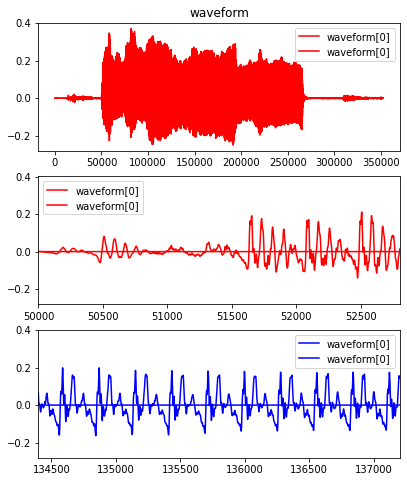

In [46]:
sk = "waveform"
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(1.6180 * 4, 4*2))
lns1=ax1.plot(waveform.t().numpy(),"red",label = "waveform[0]")
lns2=ax2.plot(waveform.t().numpy(),"red",label = "waveform[0]")
lns3=ax3.plot(waveform.t().numpy(),"blue",label = "waveform[0]")
ax1.legend(loc=0)
ax2.legend(loc=0)
ax3.legend(loc=0)
ax1.set_title(sk)
ax2.set_xlim(50000,50000+SAMPLING_RATE*0.0625) #0,44100*0.25
ax3.set_xlim(3*SAMPLING_RATE,SAMPLING_RATE*3.0625)
plt.pause(1)
#plt.savefig('./saved_image/{}_{}_double_.png'.format(filename.split(".")[0], sk)) 

Shape of spectrogram: torch.Size([2, 513, 689])
tensor([[    -inf,     -inf, -37.5202,  ...,  -9.2286, -13.4773, -22.1303],
        [    -inf,     -inf, -37.5202,  ...,  -5.2826, -13.3323, -27.5282],
        [    -inf,     -inf, -37.5204,  ...,  -3.2802, -14.3961, -28.1867],
        ...,
        [    -inf,     -inf, -37.5204,  ..., -22.0621, -22.4318, -27.6294],
        [    -inf,     -inf, -37.5202,  ..., -18.7996, -23.2836, -26.9578],
        [    -inf,     -inf, -37.5202,  ..., -18.5996, -24.1325, -23.0524]])
tensor(1032.6765)
torch.Size([513, 689])


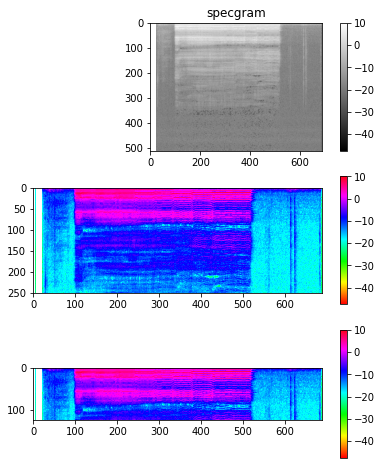

In [47]:
specgram = torchaudio.transforms.Spectrogram(n_fft=1024)(waveform)
print("Shape of spectrogram: {}".format(specgram.size()))

sk = "specgram"
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(1.6180 * 4, 4*2))
specgram = specgram[0,:,:]
print(specgram.log2())
lns1=ax1.imshow(specgram.log2().numpy(), cmap='gray') 
lns2=ax2.imshow(specgram.log2().numpy(), cmap='hsv') 
lns3=ax3.imshow(specgram.log2().numpy(), cmap='hsv') 
fig.colorbar(lns1, ax=ax1)
fig.colorbar(lns2, ax=ax2)
fig.colorbar(lns3, ax=ax3)

print(torch.max(specgram))
print(specgram.shape)

ax2.set_ylim(250,0)
ax3.set_ylim(125,0)
ax1.set_title(sk)

plt.pause(1)
# plt.savefig('./saved_images/{}_{}_double.png'.format(filename.split(".")[0], sk)) 

torch.Size([2, 513, 689])
torch.Size([513, 688])
Shape of spectrogram: torch.Size([2, 513, 689])
tensor(nan)
tensor([[    nan,     inf, 13.2300,  ...,  0.0000,  0.0000,  0.0000],
        [    nan,     inf, 12.5891,  ...,  0.0000,  0.0000,  0.0000],
        [    nan,     inf, 11.2939,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [    nan,     inf,  7.1903,  ...,  0.0000,  0.0000,  0.0000],
        [    nan,     inf, 10.4783,  ...,  0.0000,  0.0000,  0.0000],
        [    nan,     inf, 11.8958,  ...,  0.0000,  0.0000,  0.0000]])


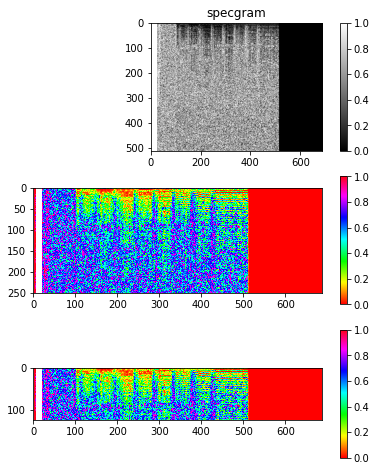

In [48]:
specgram = torchaudio.transforms.Spectrogram(n_fft=1024)(waveform)
print(specgram.shape)
ch1 = specgram[0,:,:].log2()
specgram_diff = torch.zeros(ch1.shape[0], ch1.shape[1]-1)
print(specgram_diff.shape)
print("Shape of spectrogram: {}".format(specgram.size()))

ch1_transposed = torch.t(ch1)
specgram_diff_transposed = torch.t(specgram_diff)

for i in range(0, ch1_transposed.shape[1]-1):
    specgram_diff_transposed[i] = ch1_transposed[i+1] - ch1_transposed[i]
    
specgram_diff = torch.t(specgram_diff_transposed)

print(torch.max(specgram_diff))
print(specgram_diff)

specgram_diff = (torch.sigmoid(torch.square(specgram_diff))-0.5)*2

sk = "specgram"
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(1.6180 * 4, 4*2))
lns1=ax1.imshow(specgram_diff.numpy(), cmap='gray')
lns2=ax2.imshow(specgram_diff.numpy(), cmap='hsv')
lns3=ax3.imshow(specgram_diff.numpy(), cmap='hsv')
fig.colorbar(lns1, ax=ax1)
fig.colorbar(lns2, ax=ax2)
fig.colorbar(lns3, ax=ax3)


ax2.set_ylim(250,0)
ax3.set_ylim(125,0)
ax1.set_title(sk)

plt.pause(1)
# plt.savefig('./saved_images/{}_{}_double.png'.format(filename.split(".")[0], sk)) 

In [20]:
from scipy.io import wavfile
import noisereduce as nr
# load data
rate, data = wavfile.read("./sounds/a_octave.wav")
# _, noisy_part = wavfile.read("./sounds/pure-noise-short.wav")
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("mywav_reduced_noise.wav", rate, reduced_noise)

MemoryError: Unable to allocate 157. GiB for an array with shape (352256, 60002) and data type float64

In [32]:
from scipy.io import wavfile
import librosa
import noisereduce as nr
# load data
data, rate = librosa.load("./sounds/a_octave.wav")
print(rate)
print(data)
noisy_part, _ = librosa.load("./sounds/pure-noise.wav")
print(noisy_part)

# perform noise reduction
reduced_noise = nr.reduce_noise(y = data, sr=rate, 
                                y_noise = noisy_part, n_std_thresh_stationary=1.5,
                                stationary=True)
wavfile.write("mywav_reduced_noise.wav", rate, reduced_noise)

22050
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.4248915e-06
 -9.2943992e-06  0.0000000e+00]
[ 3.1124320e-04  4.3024644e-04  2.8845662e-04 ... -2.2264503e-06
 -2.0096201e-04  0.0000000e+00]


Shape of waveform: torch.Size([2, 352256])
Sample rate of waveform: 48000


In [41]:
from scipy.io import wavfile
import librosa
import noisereduce as nr
# load data
data, rate = torchaudio.load("./sounds/a_octave.wav")
data = data[0]
print(rate)
print(data)
noisy_part, _ = torchaudio.load("./sounds/pure-noise.wav")
noisy_part = noisy_part[0]
print(noisy_part)

# perform noise reduction
reduced_noise = nr.reduce_noise(y = data, sr=rate, 
                                y_noise = noisy_part, n_std_thresh_stationary=1.5,
                                stationary=True)
wavfile.write("mywav_reduced_noise.wav", rate, reduced_noise)

48000
tensor([0., 0., 0.,  ..., 0., 0., 0.])
tensor([ 0.0009,  0.0008,  0.0008,  ..., -0.0004, -0.0005, -0.0003])


In [42]:
filepath = "mywav_reduced_noise.wav" 
waveform, sample_rate = torchaudio.load(filepath)
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

SAMPLING_RATE = 44800
filename = filepath.split("/")[-1]

Shape of waveform: torch.Size([1, 352256])
Sample rate of waveform: 48000


torch.Size([1, 513, 689])
torch.Size([513, 688])
Shape of spectrogram: torch.Size([1, 513, 689])
tensor(nan)
tensor([[    nan,     inf, 18.0935,  ...,  0.0000,  0.0000,  0.0000],
        [    nan,     inf, 12.2150,  ...,  0.0000,  0.0000,  0.0000],
        [    nan,     inf, 10.3548,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [    nan,     inf,  9.4353,  ...,  0.0000,  0.0000,  0.0000],
        [    nan,     inf,  8.5657,  ...,  0.0000,  0.0000,  0.0000],
        [    nan,     inf,  2.5678,  ...,  0.0000,  0.0000,  0.0000]])


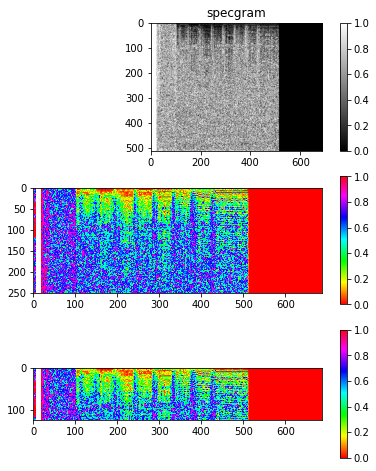

In [43]:
specgram = torchaudio.transforms.Spectrogram(n_fft=1024)(waveform)
print(specgram.shape)
ch1 = specgram[0,:,:].log2()
specgram_diff = torch.zeros(ch1.shape[0], ch1.shape[1]-1)
print(specgram_diff.shape)
print("Shape of spectrogram: {}".format(specgram.size()))

ch1_transposed = torch.t(ch1)
specgram_diff_transposed = torch.t(specgram_diff)

for i in range(0, ch1_transposed.shape[1]-1):
    specgram_diff_transposed[i] = ch1_transposed[i+1] - ch1_transposed[i]
    
specgram_diff = torch.t(specgram_diff_transposed)

print(torch.max(specgram_diff))
print(specgram_diff)

specgram_diff = (torch.sigmoid(torch.square(specgram_diff))-0.5)*2

sk = "specgram"
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(1.6180 * 4, 4*2))
lns1=ax1.imshow(specgram_diff.numpy(), cmap='gray')
lns2=ax2.imshow(specgram_diff.numpy(), cmap='hsv')
lns3=ax3.imshow(specgram_diff.numpy(), cmap='hsv')
fig.colorbar(lns1, ax=ax1)
fig.colorbar(lns2, ax=ax2)
fig.colorbar(lns3, ax=ax3)


ax2.set_ylim(250,0)
ax3.set_ylim(125,0)
ax1.set_title(sk)

plt.pause(1)
# plt.savefig('./saved_images/{}_{}_double.png'.format(filename.split(".")[0], sk)) 